https://www.kaggle.com/datasets/mirichoi0218/insurance

# 1-we want to build a model for figure out the charges for every one 
# 2-we want to make sure data entegraty 
# 3-we will train four models to choose what is the best model in prediction 
# 4-after that we will buil GUI help us in predict the new charge 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set()

# exploring dataset


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Data Cleaning

## Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values
## we have to make sure that all data we use it is numeric

In [7]:
df.sex = df.sex.map({'male':1,'female':0})
df.smoker = df.smoker.map({'yes':1,'no':0})
df.region = df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [9]:
# make sure if there null value 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### so there is no null values in the data frame 

# Building our model 

## we want to build a model to predict the chages  for everyone

In [10]:
# first we need to seprate our data to two parts train and test part
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns='charges',axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [12]:
y= df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [13]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)



In [14]:
print(X_train.shape)
print(y_train.shape)

(1070, 6)
(1070,)


# import models

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Train

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

## prediction on test data

In [17]:
pred_1 =lr.predict(X_test)
pred_2 =svm.predict(X_test)
pred_3 =rf.predict(X_test)
pred_4 =gr.predict(X_test)


In [18]:
df_pred = pd.DataFrame({'Actual':y_test,'lr':pred_1,'svm':pred_2,'rf':pred_3,'gr':pred_4})
df_pred

,Actual,lr,svm,rf,gr
482,1622.18850,2570.681340,9037.113527,1799.371478,3083.798879
481,9304.70190,13052.162446,9207.795919,9817.621482,10549.787818
700,2020.55230,4412.745105,9047.059792,1987.931801,3133.855320
1098,23045.56616,11640.760153,9224.209686,10606.040399,11358.782032
270,1719.43630,2207.288998,9036.302581,2859.573696,2962.124566
...,...,...,...,...,...
253,4260.74400,5522.531428,9066.679019,9246.427059,5910.021754
866,1141.44510,4097.635512,9042.429841,1319.183874,2196.388855
309,7749.15640,10342.100119,9151.992305,7444.915105,8229.311330
844,10072.05505,11457.951734,9229.985819,10020.986312,11767.481841


## evaluate models by visualizing


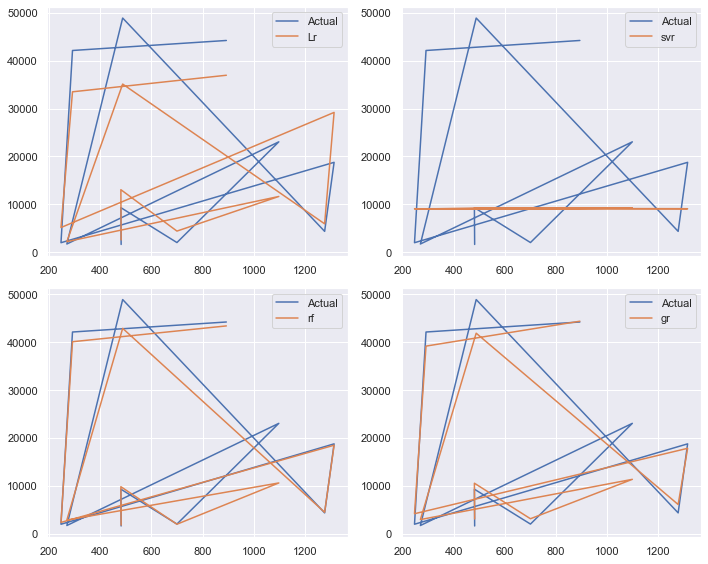

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.plot(df_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(df_pred['lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(df_pred['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(df_pred['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df_pred['Actual'].iloc[0:11],label='Actual')
plt.plot(df_pred['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()
plt.show()

### as we see the model number 4 is the best model to  fit for our data 

In [20]:
# ensure which one is the best model for our data 
from sklearn import metrics

In [21]:
score1 = metrics.r2_score(y_test,pred_1)
score2 = metrics.r2_score(y_test,pred_2)
score3 = metrics.r2_score(y_test,pred_3)
score4 = metrics.r2_score(y_test,pred_4)

In [22]:
print(score1)
print(score2)
print(score3)
print(score4)

0.7783012991171113
-0.12871576986415678
0.8531096827969306
0.8780170867509794


### as we see the model number rg is the best model to  fit for our data

In [23]:
# using absolute arror
mod1 = metrics.mean_absolute_error(y_test,pred_1)
mod2 = metrics.mean_absolute_error(y_test,pred_2)
mod3 = metrics.mean_absolute_error(y_test,pred_3)
mod4 = metrics.mean_absolute_error(y_test,pred_4)


In [24]:
print(mod1,mod2,mod3,mod4)

4051.187638051113 8597.452980466847 2780.7920602047257 2494.805687597084


### the lower  mean_abolute_error is mod4 beacause of that that so the best model is GradientBoostingRegressor()

## predict charges for a new customer

In [25]:
new = pd.DataFrame({'age':26,'sex':1,'bmi':30,'children':0,"smoker":0,"region":1},index=[0])
new

,age,sex,bmi,children,smoker,region
0,26,1,30,0,0,1


In [26]:
# we wil predict the charge value for this new customr 
gr.predict(new)

array([3486.5045713])

## saving model using joblib

In [27]:
gr =GradientBoostingRegressor ()
gr.fit(X,y)

GradientBoostingRegressor()

In [28]:
import joblib

In [29]:
joblib.dump(gr,'best_model_insurance')

['best_model_insurance']

In [30]:
model = joblib.load('best_model_insurance')

In [31]:
model.predict(new)

array([2906.85080975])

# GUI

In [32]:
import tkinter as tk
from tkinter import messagebox

# Load the pre-trained machine learning model
model

# Create the GUI window
window = tk.Tk()
window.title("Medical Charges Predictor")
window.geometry("400x300")

# Create the input labels and entry boxes
age_label = tk.Label(window, text="Age:")
age_label.pack()
age_entry = tk.Entry(window)
age_entry.pack()

sex_label = tk.Label(window, text="Sex:")
sex_label.pack()
sex_entry = tk.Entry(window)
sex_entry.pack()

bmi_label = tk.Label(window, text="BMI:")
bmi_label.pack()
bmi_entry = tk.Entry(window)
bmi_entry.pack()

children_label = tk.Label(window, text="Number of Children:")
children_label.pack()
children_entry = tk.Entry(window)
children_entry.pack()

smoker_label = tk.Label(window, text="Smoker:")
smoker_label.pack()
smoker_entry = tk.Entry(window)
smoker_entry.pack()

region_label = tk.Label(window, text="Region:")
region_label.pack()
region_entry = tk.Entry(window)
region_entry.pack()

# Create abutton to predict the medical charges
def predict_charges():
    # Get the input values from the entry boxes
    age = float(age_entry.get())
    sex = float(sex_entry.get())
    bmi = float(bmi_entry.get().replace(',', '.'))
    children = float(children_entry.get())
    smoker = float(smoker_entry.get())
    region = float(region_entry.get())

    # Create a numpy array with the input values
    input_data = np.array([[age, sex, bmi, children, smoker, region]])

    # Use the pre-trained model to predict the medical charges
    charges = model.predict(input_data)

    # Display the predicted charges in a message box
    tk.messagebox.showinfo("Predicted Charges", f"The predicted medical charges are ${charges[0]:.2f}")

# Create a button to predict the charges
predict_button = tk.Button(window, text="Predict Charges", command=predict_charges)
predict_button.pack()

# Run the GUI
window.mainloop()